<strong style="font-size: 2.5em; text-align: center"><i style="text-align: center">PREDICTION DU DEPART CLIENT</i>: CAS DES BANQUES</strong>

<img src="./Churn.png">

<img scr="Churn.png">

<h1>INTRODUCTION</h1>

<h1>Importation des packages et modules</h1>

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler, OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle

<h2>Pour les graphismes</h2>
<strong style="padding: 0em 0em 0em 5em">pyplot</strong>: module du package matplotlib qui permet de tracer les graphismes<br>
<strong style="padding: 0em 0em 0em 5em">seaborn</strong>: permet de tracer des courbes mais avec de meilleures performances que matplotlib<br>
<hr>

<h2>Manipulation de notre dataset</h2>
<strong style="padding: 0em 0em 0em 5em">numpy</strong>: permet de manipuler les matrices<br>
<strong style="padding: 0em 0em 0em 5em">pandas</strong>: permet de manipuler les fichiers excel<br>
<hr>
    
<h2>Entrainement de notre modèle grâce à la librairie <u>scikit-learn</u>(sklearn)</h2>
<strong style="padding: 0em 0em 0em 5em">preprocessing</strong>(RobustScaler, OneHotEncoder): package de scikit-learn permettant de faire du pré-processing(traitement de nos données avant notre training)<br>

<strong style="padding: 0em 0em 0em 5em">model_selection</strong>: permet de séparer notre jeu de données en train-set(données d'entrainement) et en test-set(données de test) et en feature et en label(ou target dans le cas de test-set) grâce au module <i>train_test_split</i> de scikit-learn<br>
<strong style="padding: 0em 0em 0em 5em">linear_model</strong>: package contenant les différents modèles linéaires mais dans notre cas nous utiliserons son module LogisticRegression<br>

<hr>
<h2>Sauvegarde du modèle obtenue</h2>
<strong style="padding: 0em 0em 0em 5em">pickle</strong>: Après notre training nous devrons importer notre modèle pour da mise en production, et pour se faire nous utiliseront ce package.<br>

<h1>Etapes de réalisation d'un modèle de machine learning</h1>
<img src="./etape_ml.jpg">


<h1>RECUPERATION, NETOYAGE & EXPLORATION DES DONNEES</h1>

In [91]:
# importation de notre dataset et visualisation de sa dimension
df = pd.read_csv('Churn_Modelling.csv')
df.shape

(10000, 14)

In [66]:
# visualisation des 20 premières lignes de notre dataset
df.head(15)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


<h1>Description des variables</h1>
<strong>CustomerId</strong>: Identifiant du client dans la base de données<br>
<strong>Surname</strong>: Prénoms du client<br>
<strong>CreditScore</strong>: crédit scoring = un outil qui permet aux banques d'évaluer le risque représenté par le demandeur de prêt. En d'autres termes, il permet à l'établissement de crédit de garantir la solvabilité du candidat au prêt<br>
<strong>Geography</strong>: Situation géographique du client<br>
<strong>Gender</strong>: Sexe du client<br>
<strong>Age</strong>:<br>
<strong>Tenure</strong>: Durée du prêt, La durée d'occupation est la période ou la durée pour laquelle le montant du prêt est sanctionné. <br>
<strong>Balance</strong>: Solde du compte<br>
<strong>NumOfProducts</strong>: Numéro du produit auquel il a souscrit dans la banque<br>
<strong>HasCrCard</strong>: A-t-il un carte de crédit.<br>
<strong>IsActiveMember</strong>: Est-il un membre actif.<br>
<strong>EstiatedSalary</strong>: Salaire estimé du client.<br>
<strong>Exited</strong>: Le client s'en est-il allé(1) ou pas(0)<br>

In [67]:
# Suppression des features(colonnes) qui nous serviront pas d'un premier à bord pour notre training
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [68]:
# on vérifie qu'il n' y pas de valeur manque
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [69]:
# visualisation de la quantité de modalité de chaque feature
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

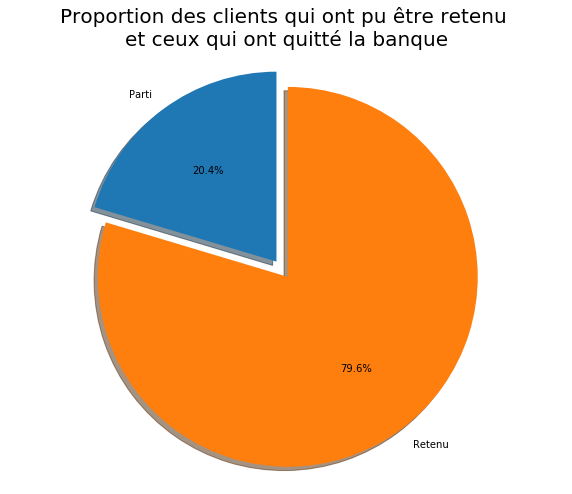

In [70]:
# observation de nos étiquettes et leurs proportions dans notre dataset
labels = 'Parti', 'Retenu'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion des clients qui ont pu être retenu \net ceux qui ont quitté la banque", size = 20)
plt.show()

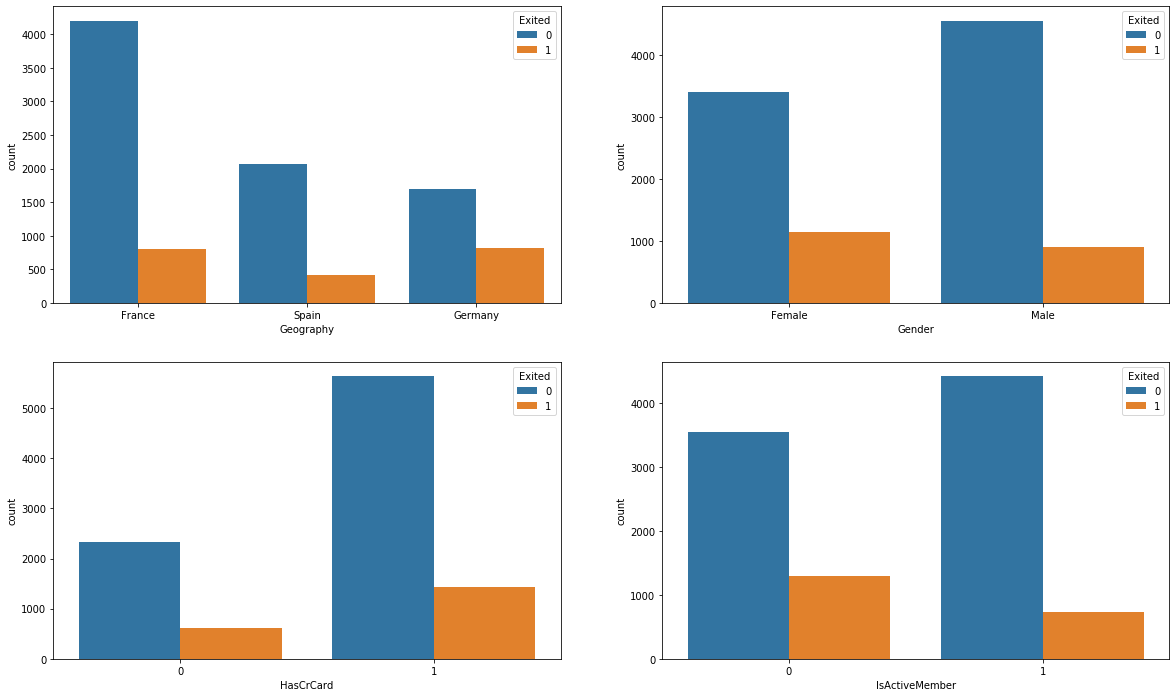

In [71]:
# histogramme des variables catégorielles
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

<ul>
    <li>La majorité des données proviennent de personnes françaises. Cependant, la proportion de clients désabonnés est inversement proportionnelle à la population de clients faisant allusion au fait que la banque pourrait avoir un problème (peut-être pas assez de ressources de service client allouées) dans les zones où elle a moins de clients.</li>
    <li>La proportion de clientèles féminines est également supérieure à celle des clients masculins </li>
    <li>Fait intéressant, la majorité des clients qui ce sont désabonnés sont ceux qui ont des cartes de crédit.Étant donné que la majorité des clients ont des cartes de crédit, cela pourrait s'avérer être une simple coïncidence. Sans surprise, les membres inactifs ont un taux de désabonnement plus important. Il est inquiétant de constater que la proportion globale de membres inactifs est assez élevée, ce qui suggère que la banque pourrait avoir besoin d'un programme mis en œuvre pour transformer ce groupe en clients actifs, car cela aura certainement un impact positif sur le taux de désabonnement de la clientèle.</li>
</ul>
 

In [72]:
# séparation de notre dataset en features et en labels
x = df.iloc[:,0:10].values
y = df.iloc[:, 10:11].values

In [73]:
# transformation de nos features qualitatives en matrice sous forme quantitative
enc = OneHotEncoder(sparse=False)
x1 = enc.fit_transform(x[:, 1].reshape(-1, 1))
x = np.delete(x, 1, axis=1)

In [74]:
x2 = enc.fit_transform(x[:, 1].reshape(-1, 1))
x = np.delete(x, 1, axis=1)

In [75]:
x = np.concatenate((x, x1, x2), axis=1)

In [76]:
# normalisation de nos données grâce à min max et découpage de nos données en train-set et test-set
norm = RobustScaler()
x = norm.fit_transform(x)
y = norm.fit_transform(y.reshape(-1, 1))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

<h1>MODELISATION DE NOTRE IA</h1>

In [77]:
# Entrainement de notre IA avec affichage son taux de succès
model = LogisticRegression()
model.fit(x_train, y_train)
score = model.score(x_train, y_train)
print("Test score: {0:.2f} %".format(100 * score)) 

Test score: 81.26 %


E:\programme_windows\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\programme_windows\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<h1>EVALUATION DE NOTRE MODELE</h1>

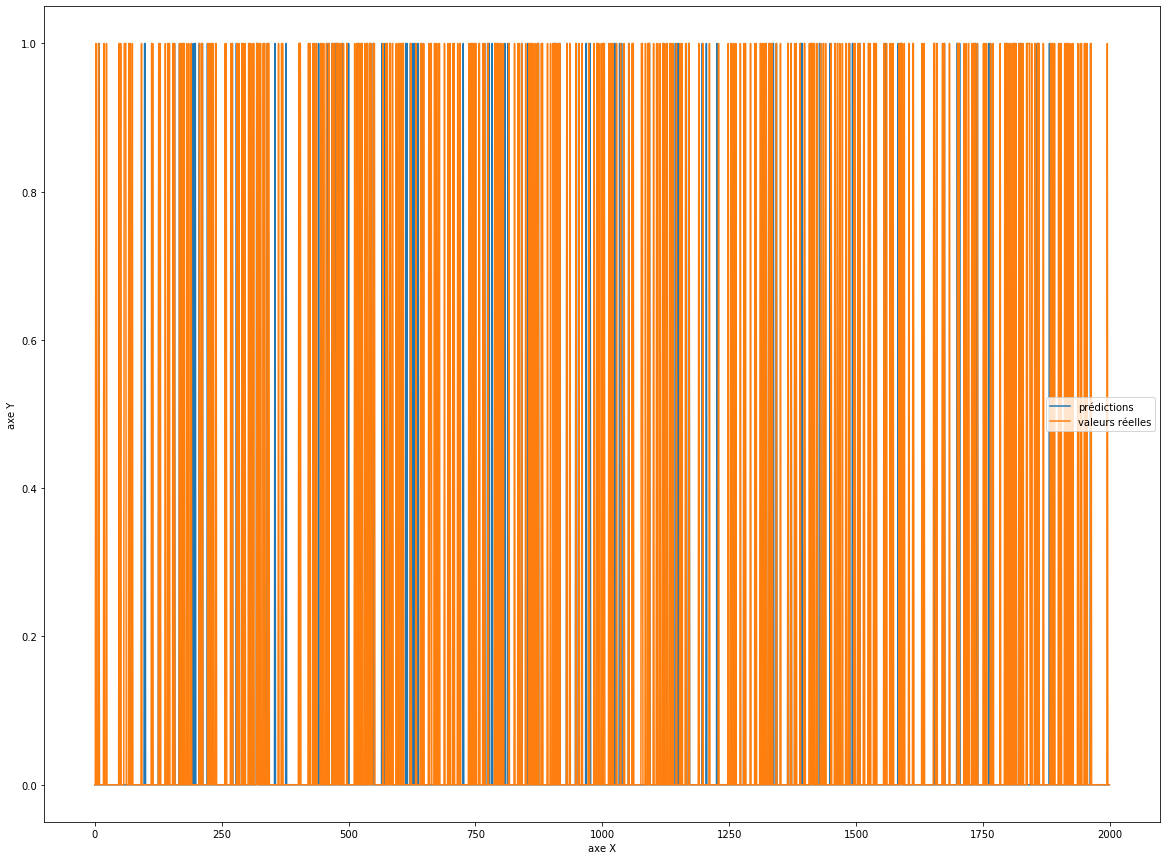

In [79]:
# observation de nos prédictions
plt.figure(figsize=(20, 15))
plt.plot((y_pred), label='prédictions')
plt.plot((y_test), label='valeurs réelles')


#plt.title('Figure 1')
plt.xlabel('axe X')
plt.ylabel('axe Y')
plt.legend()
plt.show()

In [80]:
# test de l'IA sur nos données de test
score = model.score(x_test, y_test)
print("Test score: {0:.2f} %".format(100 * score)) 

Test score: 80.05 %


In [81]:
# affichage des paramètres de notre modèle
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

<h1>MISE EN PRODUCTION</h1>

In [85]:
# sauvegarde de notre modèle dans le fichier lr_model.sav
filename= 'lr_model.sav'
pickle.dump(model, open(filename, 'wb'))
load_lr_model =pickle.load(open(filename, 'rb'))
load_lr_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
# vérification du fait que notre modèle a bien été sauvegardé dans notre fichier
score = load_lr_model.score(x_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))  
Ypredict = Pickled_LR_Model.predict(x_test)  

Test score: 80.05 %


In [37]:
# mise en place de notre pipeline de mise en production

def submit(df):
    df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)
    x = df.iloc[:,0:10].values
    y = df.iloc[:, 10:11].values

    enc = OneHotEncoder(sparse=False)
    x1 = enc.fit_transform(x[:, 1].reshape(-1, 1))
    x = np.delete(x, 1, axis=1)

    x2 = enc.fit_transform(x[:, 1].reshape(-1, 1))
    x = np.delete(x, 1, axis=1)

    x = np.concatenate((x, x1, x2), axis=1)

    norm = RobustScaler()
    x = norm.fit_transform(x)
    y = norm.fit_transform(y.reshape(-1, 1))

    return Pickled_LR_Model.predict(x)

<h1>CONCLUSION</h1>

<ul>
    <li>Cross validation</li>
    <li>Grid search</li>
</ul>

In [94]:
df[1]

KeyError: 1